In [120]:
## Git Hub Repo: https://github.com/hellystia/Final-Project

# Machine Learning for Rental Predictions

In [121]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [122]:
bikes = pd.read_csv("C:/Users/Helly/Desktop/Final Project/hour.csv")

In [123]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check Data Types

In [124]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Drop instant, dteday, casual, and registered to make this easier for the machine learning model.

In [125]:
x = bikes[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed']]

In [126]:
y = bikes['cnt']

In [127]:
## I've defined my x variables and y variables so I can see how the x variables will predict Y.

### Define Train/Test Split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [129]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10427, 10) (10427,)
(6952, 10) (6952,)


## Create a Linear Regression Model 

In [130]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### Examine predictions the machine learning algorithm has made about the model.

In [131]:
predictions = lm.predict(x_test)
predictions

array([278.46355767, 145.43481669, 276.91066269, ..., 430.11092397,
        78.69741798, 128.51294351])

### Look at a plot of the model!

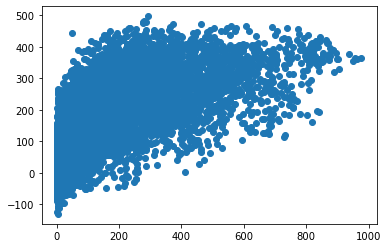

In [132]:
plt.scatter(y_test, predictions)

### How accurate is this?

In [133]:
print("Score:", lm.score(x_test, y_test))

Score: 0.37031243161882754


In [134]:
## Only 38% accurate without the other two variables: casual and registered.

### Checking the Mean Squared Error

In [135]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

142.949776218118

In [136]:
## The value should be closer to zero. So there's probably a bit of error in this.

## Try Using K-Fold Cross-Validation

In [137]:
kfold = KFold(5, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 17374 17377 17378], test: [    4     5     6 ... 17372 17375 17376]
train: [    0     1     2 ... 17376 17377 17378], test: [    7    12    17 ... 17360 17364 17370]
train: [    0     3     4 ... 17376 17377 17378], test: [    1     2    10 ... 17368 17373 17374]
train: [    0     1     2 ... 17375 17376 17377], test: [    3     8     9 ... 17367 17369 17378]
train: [    1     2     3 ... 17375 17376 17378], test: [    0    14    15 ... 17366 17371 17377]


C:\Users\Helly\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [138]:
print(cross_val_score(lm, x,y, cv=3))

[0.25698579 0.29406949 0.29077327]


In [139]:
## Using K-Folds to test different iterations of the model. Now it is less accurate.

## Overall, this just tells me it would be hard to predict sales based on environmental factors because even with the full
## dataset, we are seeing that not everything is accounted for. We do not have data on price, marketing, etc. So I would
## guess that these unaccounted items are playing a big role, moreso than the environment.